<a href="https://colab.research.google.com/github/shalu236616/AI-and-ML-PROJECT-/blob/main/AI_ML_ASSIGNMENT_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

I am taking Breast Cancer dataset from scikit-learn, which is having 569 rows  and 30 columns (features).

In [ ]:
# Useful libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
import seaborn as sns

In [ ]:
# Load the dataset
data = load_breast_cancer()
X = data.data
y = data.target
print("Shape of feature matrix (X):", X.shape)
print("Shape of target vector (y):", y.shape)
feature_names = data.feature_names
target_names = data.target_names


Shape of feature matrix (X): (569, 30)
Shape of target vector (y): (569,)


In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


**DECISION TREE MOODEL IMPLEMENTATION**

In [ ]:
# 1. Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
dt_preds = dt_model.predict(X_test)


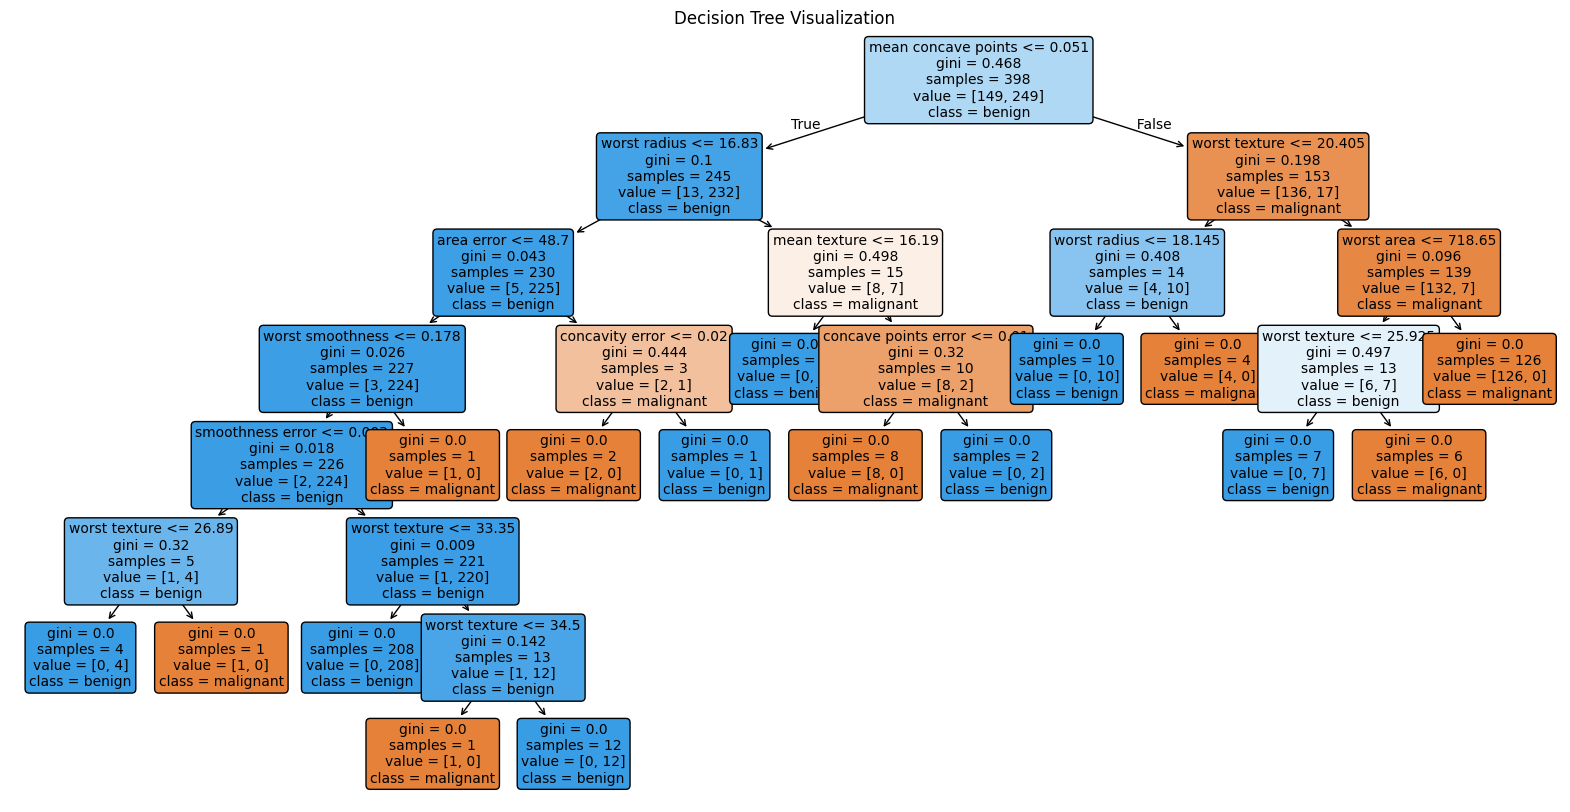

In [ ]:
plt.figure(figsize=(20, 10))
plot_tree(dt_model,
          feature_names=feature_names,
          class_names=target_names,
          filled=True,
          rounded=True,
          fontsize=10)
plt.title("Decision Tree Visualization")
plt.show()


**MODIFIED DECISION TREE WITH ADABOOST**

In [ ]:
# 2. AdaBoost with Decision Tree
ada_model = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1), n_estimators=50, random_state=42)
ada_model.fit(X_train, y_train)
ada_preds = ada_model.predict(X_test)
# Train AdaBoost with Decision Tree stumps
ada_model = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=1),
    n_estimators=10,  # Using 10 for easier plotting
    random_state=42
)
ada_model.fit(X_train, y_train)




AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                   n_estimators=10, random_state=42)

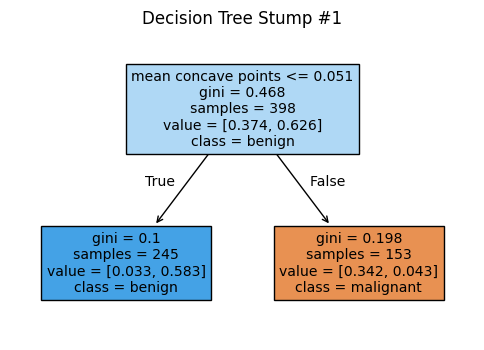

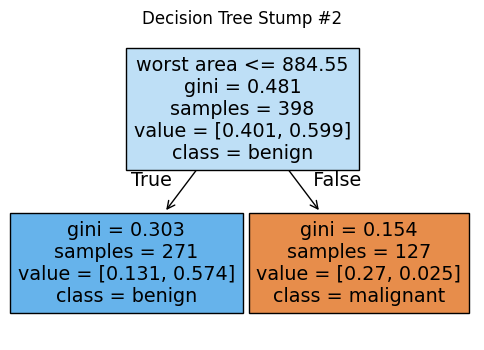

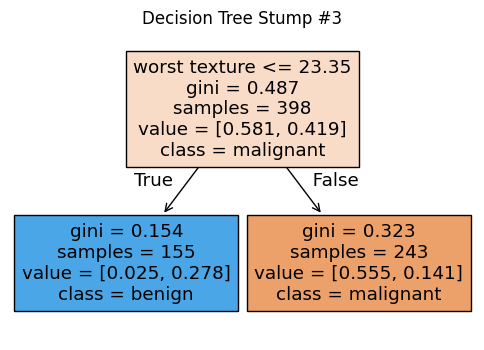

In [ ]:
 # Plot the first 3 weak learners (trees)
for i, tree in enumerate(ada_model.estimators_[:3]):
    plt.figure(figsize=(6, 4))
    plot_tree(tree, feature_names=data.feature_names, class_names=data.target_names, filled=True)
    plt.title(f"Decision Tree Stump #{i+1}")
    plt.show()


***LOGISTIC REGRESSION IMPLEMENTATION ***

In [ ]:
# 3. Logistic Regression
lr_model = LogisticRegression(max_iter=5000)
lr_model.fit(X_train, y_train)
lr_preds = lr_model.predict(X_test)



In [ ]:

def evaluate_model(name, y_true, y_pred):
    print(f"\n{name} Accuracy: {accuracy_score(y_true, y_pred):.4f}")
    print(f"{name} Confusion Matrix:\n{confusion_matrix(y_true, y_pred)}")
    print(f"{name} Classification Report:\n{classification_report(y_true, y_pred, target_names=target_names)}")

evaluate_model("Decision Tree", y_test, dt_preds)
evaluate_model("AdaBoost", y_test, ada_preds)
evaluate_model("Logistic Regression", y_test, lr_preds)


Decision Tree Accuracy: 0.9415
Decision Tree Confusion Matrix:
[[ 60   3]
 [  7 101]]
Decision Tree Classification Report:
              precision    recall  f1-score   support

   malignant       0.90      0.95      0.92        63
      benign       0.97      0.94      0.95       108

    accuracy                           0.94       171
   macro avg       0.93      0.94      0.94       171
weighted avg       0.94      0.94      0.94       171


AdaBoost Accuracy: 0.9708
AdaBoost Confusion Matrix:
[[ 61   2]
 [  3 105]]
AdaBoost Classification Report:
              precision    recall  f1-score   support

   malignant       0.95      0.97      0.96        63
      benign       0.98      0.97      0.98       108

    accuracy                           0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171


Logistic Regression Accuracy: 0.9766
Logistic Regression Confusion Matrix:
[[ 61   2]
 [  2 106]]
Logistic Regre